In [169]:
import math
import numpy as np
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt

In [170]:
#constants
n,m = 5, 5

In [171]:
#methods

def gen_theoretical_matrix(x_n, y_n):
    matrix = np.zeros((x_n, y_n))
    for i in range(n):
      for j in range(m):
        matrix[i][j] = math.cos(math.log(np.random.uniform(0, 1))) ** 2
    return matrix / sum(sum(matrix))

def generate_estimate(axis):
    l = [0]
    for i in range(len(axis)):
        l.append(l[i]+axis[i])
    return l


def generate_sample(k, l, s):
    sample = [[0] * 2 for i in range(k)]
    for _ in range(k):
        r_val = np.random.uniform(0,1)
        for i in range(len(l)-1):
            if l[i] < r_val < l[i+1]:
                sample[_][0] = i+1
                for j in range(len(s)-1):
                    if s[j] < r_val < s[j+1]:
                        sample[_][1] = j+1
                        break
                break
    return sample


def point_estimate_math_mean(sample):
    return sum(sample) / len(sample)


def point_estimate_variance(sample):
    mean = point_estimate_math_mean(sample)
    result = 0.0
    for element in sample:
        result += (element - mean) ** 2
    return result / (len(sample) - 1)


def confidence_interval_math_mean(sample, significance_level):
    standard_deviation = np.sqrt(point_estimate_variance(sample))
    u_coefficient = stats.norm.ppf(1 - significance_level / 2)
    epsilon = standard_deviation * u_coefficient / np.sqrt(len(sample))
    return -epsilon, epsilon


def confidence_interval_variance(sample, significance_level):
    left_chi_coefficient = stats.chi2.ppf(1 - significance_level / 2, n - 1)
    right_chi_coefficient = stats.chi2.ppf(significance_level / 2, n - 1)
    est_variance = point_estimate_variance(sample)
    epsilon = (n - 1) * est_variance
    return epsilon / left_chi_coefficient, epsilon / right_chi_coefficient

In [172]:
def print_hist(sample, component_name):
    plt.hist(sample)
    plt.title("Histogram of" + component_name + "component of DRV")
    plt.xlabel("Value")
    plt.ylabel("Amount")
    plt.legend((component_name + " component", ''))
    plt.show()

Проверяем теоретическую матрицу:
Сумма элементов равна: 
1.0
Теоретическая матрица:
[[0.04920067 0.05319939 0.04162486 0.03751559 0.06035915]
 [0.04449549 0.04834493 0.00515713 0.05414008 0.04608204]
 [0.01178696 0.04446093 0.04410096 0.0479082  0.00408583]
 [0.02654133 0.03963342 0.0597972  0.01320142 0.0483747 ]
 [0.06027906 0.04418398 0.02632053 0.04559869 0.04360747]]


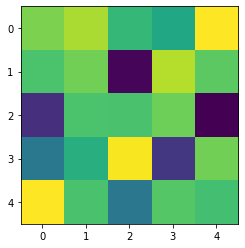

In [173]:
theoretical_matrix = gen_theoretical_matrix(n, m)

print("Проверяем теоретическую матрицу:")
print("Сумма элементов равна: ")
print(sum(sum(theoretical_matrix)))
print("Теоретическая матрица:")
print(theoretical_matrix)

q = theoretical_matrix.sum(axis=0)
r = theoretical_matrix.sum(axis=1)
plt.imshow(theoretical_matrix)

In [174]:
l_q = generate_estimate(q)
l_r = generate_estimate(r)

P = generate_sample(100, l_q, l_r)

x_sample = [i[0] for i in P]
y_sample = [i[1] for i in P]

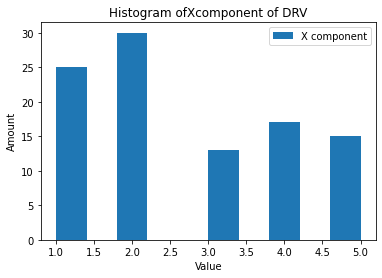

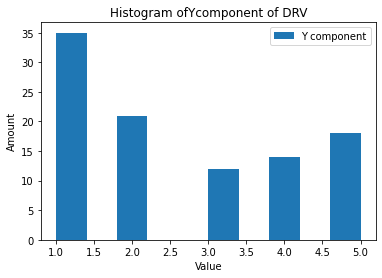

In [175]:
print_hist(x_sample,"X")
print_hist(y_sample,"Y")

In [176]:
print('Для точечных оценок матожидания используем выборочное среднее:')
M_X = point_estimate_math_mean(x_sample)
print(f'M[X]={M_X}')
M_Y = point_estimate_math_mean(y_sample)
print(f'M[Y]={M_Y}')

print('Для точечных оценок дисперсии используем исправленную выборочную дисперсию:')
D_X = point_estimate_variance(x_sample)
print(f'D[X]={D_X}')
D_Y = point_estimate_variance(y_sample)
print(f'D[Y]={D_Y}')

print('Доверительный интервал для матожидания при уровне значимости 0.01:')
M_X_tuple = confidence_interval_math_mean(x_sample, 0.01)
print(f'[{M_X + M_X_tuple[0]}; {M_X + M_X_tuple[1]}]')
M_Y_tuple = confidence_interval_math_mean(y_sample, 0.01)
print(f'[{M_Y + M_Y_tuple[0]}; {M_Y + M_Y_tuple[1]}]')

print('Доверительный интервал для дисперсии при уровне значимости 0.01:')
D_X_tuple = confidence_interval_variance(x_sample, 0.01)
print(f'[{ D_X_tuple[0]}; {D_X + D_X_tuple[1]}]')
D_Y_tuple = confidence_interval_variance(y_sample, 0.01)
print(f'[{D_Y + D_Y_tuple[0]}; {D_Y + D_Y_tuple[1]}]')

Для точечных оценок матожидания используем выборочное среднее:
M[X]=2.67
M[Y]=2.59
Для точечных оценок дисперсии используем исправленную выборочную дисперсию:
D[X]=1.980909090909093
D[Y]=2.325151515151513
Доверительный интервал для матожидания при уровне значимости 0.01:
[2.3074654913776516; 3.0325345086223483]
[2.1972260206589787; 2.982773979341021]
Доверительный интервал для дисперсии при уровне значимости 0.01:
[0.5332098426640912; 40.26136256698815]
[2.951022575693285; 47.25798301613881]
